## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "1QX63ANN8QZG7HF7"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "TSLA"

Import the appropriate libraries in the lines below each comment:

In [7]:
# pandas
import pandas as pd
# requests
import requests 
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [11]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=1min&apikey=1QX63ANN8QZG7HF7


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [12]:
TSLA = requests.get(link)

Print the HTTP response:

In [15]:
print(TSLA)

<Response [200]>


Print the data:

In [17]:
print(TSLA.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "TSLA",
        "3. Last Refreshed": "2019-09-23 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-23 16:00:00": {
            "1. open": "241.1100",
            "2. high": "241.3000",
            "3. low": "241.1100",
            "4. close": "241.2500",
            "5. volume": "47970"
        },
        "2019-09-23 15:59:00": {
            "1. open": "241.3400",
            "2. high": "241.3500",
            "3. low": "241.1100",
            "4. close": "241.1100",
            "5. volume": "25560"
        },
        "2019-09-23 15:58:00": {
            "1. open": "241.3600",
            "2. high": "241.3900",
            "3. low": "241.2700",
            "4. close": "241.3200",
            "5. volume": "26965"
        },
        "2019-09-23 1

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [18]:
ts = TimeSeries(key= api_key, output_format= 'pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [19]:
data, meta_data = ts.get_intraday(symbol= ticker ,interval='1min', outputsize='compact')

Print the data:

In [20]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-23 14:21:00  242.5800  242.5800  242.4601  242.4845     1373.0
2019-09-23 14:22:00  242.4293  242.5300  242.3700  242.5100     4557.0
2019-09-23 14:23:00  242.6000  242.6000  242.5400  242.5400     2885.0
2019-09-23 14:24:00  242.5000  242.5800  242.5000  242.5000     2623.0
2019-09-23 14:25:00  242.5000  242.5000  242.3890  242.3890     2200.0
2019-09-23 14:26:00  242.3735  242.6000  242.3735  242.5538     3478.0
2019-09-23 14:27:00  242.5470  242.5470  242.4900  242.4966     1404.0
2019-09-23 14:28:00  242.5299  242.6400  242.5299  242.6300     1758.0
2019-09-23 14:29:00  242.6100  242.8000  242.6100  242.8000     7531.0
2019-09-23 14:30:00  242.8700  242.8700  242.7700  242.8400     2163.0
2019-09-23 14:31:00  242.7900  242.7900  242.6400  242.6450     3239.0
2019-09-23 14:32:00  242.6100  242.6300  242.5400  242.5400     5247.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

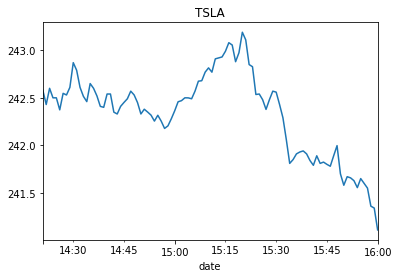

In [21]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [24]:
data.to_excel("TSLAStockData.xlsx")